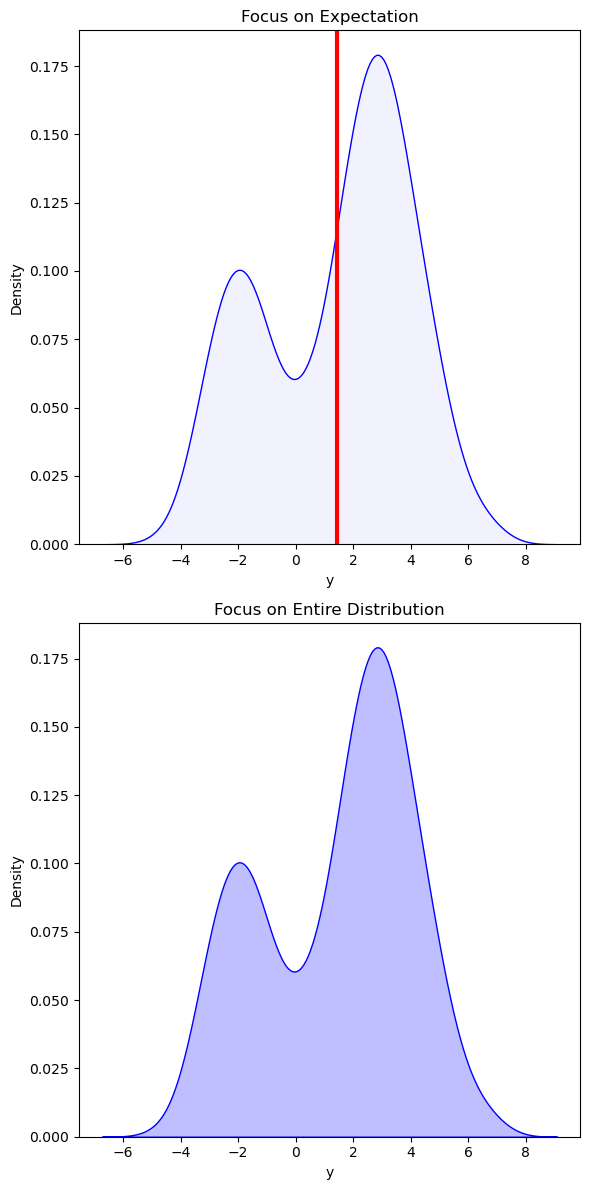

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate a bimodal distribution: mixture of two Gaussians
np.random.seed(0)
data1 = np.random.normal(loc=-2, scale=1, size=300)
data2 = np.random.normal(loc=3, scale=1.5, size=700)
data = np.concatenate([data1, data2])

plt.figure(figsize=(6, 12))

# Plot focusing on the expectation of the distribution
plt.subplot(2, 1, 1)
sns.kdeplot(data, fill=True, color="blue", alpha=0.05)
plt.axvline(np.mean(data), color='red', linestyle='-', linewidth=3)
plt.title("Focus on Expectation")
plt.xlabel("y")
plt.ylabel("Density")

# Plot focusing on the whole distribution
plt.subplot(2, 1, 2)
sns.kdeplot(data, fill=True, color="blue")
plt.title("Focus on Entire Distribution")
plt.xlabel("y")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

## CDE-methods restriction

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import matplotlib
from matplotlib import rc

# Set the font dictionaries (for correct font properties)
matplotlib.rcParams['font.serif'] = "Palatino"
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.sans-serif'] = "Helvetica"
matplotlib.rcParams['axes.labelsize'] = 11
matplotlib.rcParams['font.size'] = 11
rc('text', usetex=True)

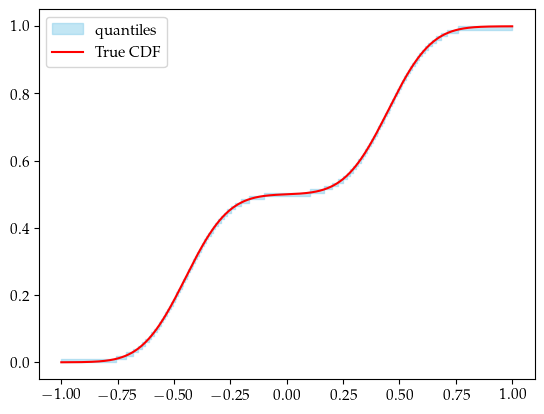

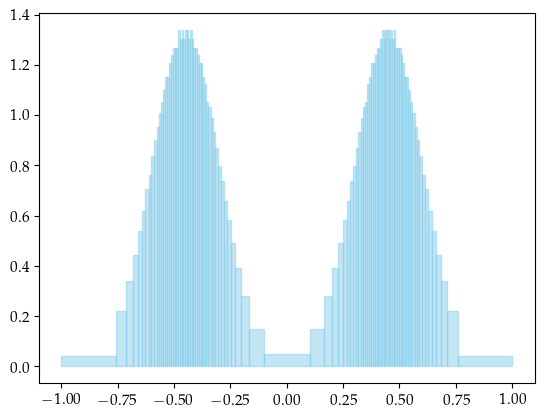

In [43]:




x_points_dense = np.linspace(-1, 1, 10000)
y_points_dense = bimodal_gaussian_mixture_cdf(x_points_dense)

n_quants = 100
quantiles = np.linspace(1/n_quants, 1 - 1/n_quants, n_quants)
watned_x_vals = np.argmin(np.abs(y_points_dense.reshape(-1, 1) - quantiles), axis=0)

for i in range(n_quants -1):
    idx = watned_x_vals[i]
    idx_next = watned_x_vals[i + 1]
    plt.fill_betweenx([y_points_dense[idx], y_points_dense[idx_next]], x_points_dense[idx], x_points_dense[idx_next], color='skyblue', alpha=0.5)

plt.fill_betweenx([0, y_points_dense[watned_x_vals[0]]], -1, x_points_dense[watned_x_vals[0]], color='skyblue', alpha=0.5, label="Quantiles")
plt.fill_betweenx([y_points_dense[watned_x_vals[-1]], 1], x_points_dense[watned_x_vals[-1]], 1, color='skyblue', alpha=0.5)

plt.plot(x_points_dense, y_points_dense, 'r-', label='True CDF')
plt.legend()
plt.show()

volume = 1/(n_quants+1)
for i in range(n_quants -1):
    
    idx = watned_x_vals[i]
    idx_next = watned_x_vals[i + 1]

    length = x_points_dense[idx_next] - x_points_dense[idx]
    curr_volum = volume / length

    plt.fill_betweenx([0, curr_volum], x_points_dense[idx], x_points_dense[idx_next], color='skyblue', alpha=0.5)

plt.fill_betweenx([0, volume/(x_points_dense[watned_x_vals[0]] - (-1))], -1, x_points_dense[watned_x_vals[0]], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, volume/(1 - x_points_dense[watned_x_vals[-1]])],  x_points_dense[watned_x_vals[-1]], 1, color='skyblue', alpha=0.5)

plt.show()

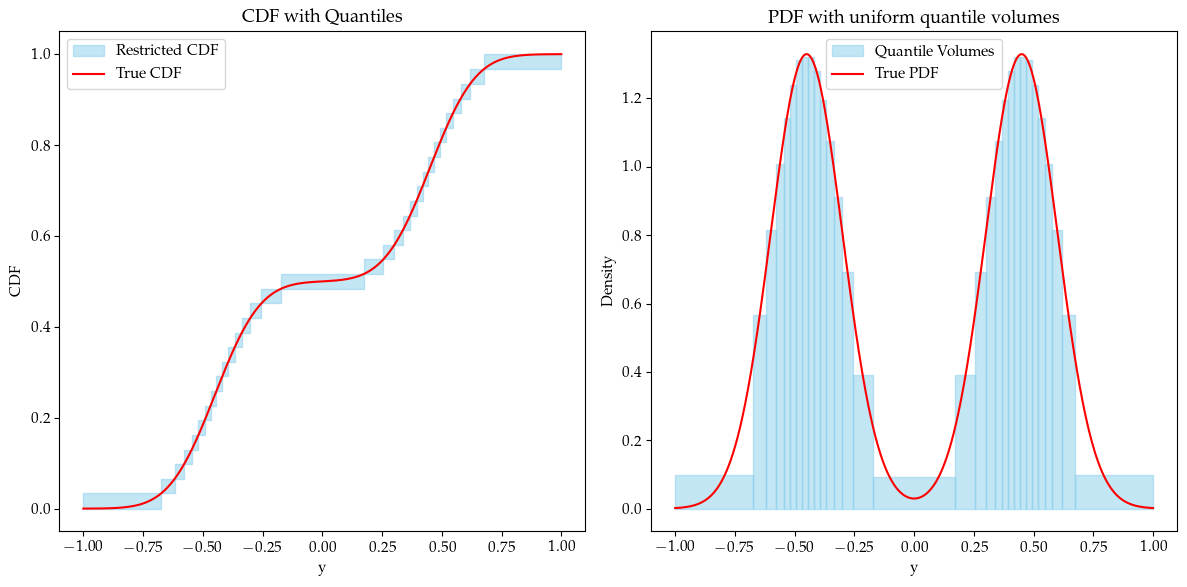

In [53]:
# Adjusting parameters for the bimodal Gaussian mixture as provided
mean1 = -0.45
mean2 = 0.45
std = 0.15  # Common standard deviation
weight1 = weight2 = 0.5  # Equal weights

# Define the bimodal Gaussian mixture CDF
def bimodal_gaussian_mixture_cdf(x):
    return weight1 * norm.cdf(x, mean1, std) + weight2 * norm.cdf(x, mean2, std)

def bimodal_gaussian_mixture_pdf(x):

    return weight1 * norm.pdf(x, mean1, std) + weight2 * norm.pdf(x, mean2, std)

# Recalculate the CDF with new parameters
x_points_dense = np.linspace(-1, 1, 10000)
y_points_dense = bimodal_gaussian_mixture_cdf(x_points_dense)
y_points_pdf = bimodal_gaussian_mixture_pdf(x_points_dense)

# Calculate quantile positions
n_quants = 30
quantiles = np.linspace(1/n_quants, 1 - 1/n_quants, n_quants)
wanted_x_vals = np.searchsorted(y_points_dense, quantiles)  # More efficient than argmin for this purpose

plt.figure(figsize=(12, 6))

# Plot 1: Bimodal Gaussian Mixture CDF with quantiles
plt.subplot(1, 2, 1)
for i in range(n_quants -1):
    idx = wanted_x_vals[i]
    idx_next = wanted_x_vals[i + 1]
    plt.fill_betweenx([y_points_dense[idx], y_points_dense[idx_next]], x_points_dense[idx], x_points_dense[idx_next], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, y_points_dense[wanted_x_vals[0]]], -1, x_points_dense[wanted_x_vals[0]], color='skyblue', alpha=0.5, label="Restricted CDF")
plt.fill_betweenx([y_points_dense[wanted_x_vals[-1]], 1], x_points_dense[wanted_x_vals[-1]], 1, color='skyblue', alpha=0.5)
plt.plot(x_points_dense, y_points_dense, 'r-', label='True CDF')
plt.title('CDF with Quantiles')
plt.xlabel('y')
plt.ylabel('CDF')
plt.legend()

# Plot 2: Volumes under the quantiles
plt.subplot(1, 2, 2)
volume = 1/(n_quants+1)
for i in range(n_quants -1):
    idx = wanted_x_vals[i]
    idx_next = wanted_x_vals[i + 1]
    length = x_points_dense[idx_next] - x_points_dense[idx]
    curr_volume = volume / length
    plt.fill_betweenx([0, curr_volume], x_points_dense[idx], x_points_dense[idx_next], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, volume/(x_points_dense[wanted_x_vals[0]] + 1)], -1, x_points_dense[wanted_x_vals[0]], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, volume/(1 - x_points_dense[wanted_x_vals[-1]])],  x_points_dense[wanted_x_vals[-1]], 1, color='skyblue', alpha=0.5, label="Quantile Volumes")
plt.plot(x_points_dense, y_points_pdf, 'r-', label='True PDF')
plt.title('PDF with uniform quantile volumes')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('figure.png')
plt.show()


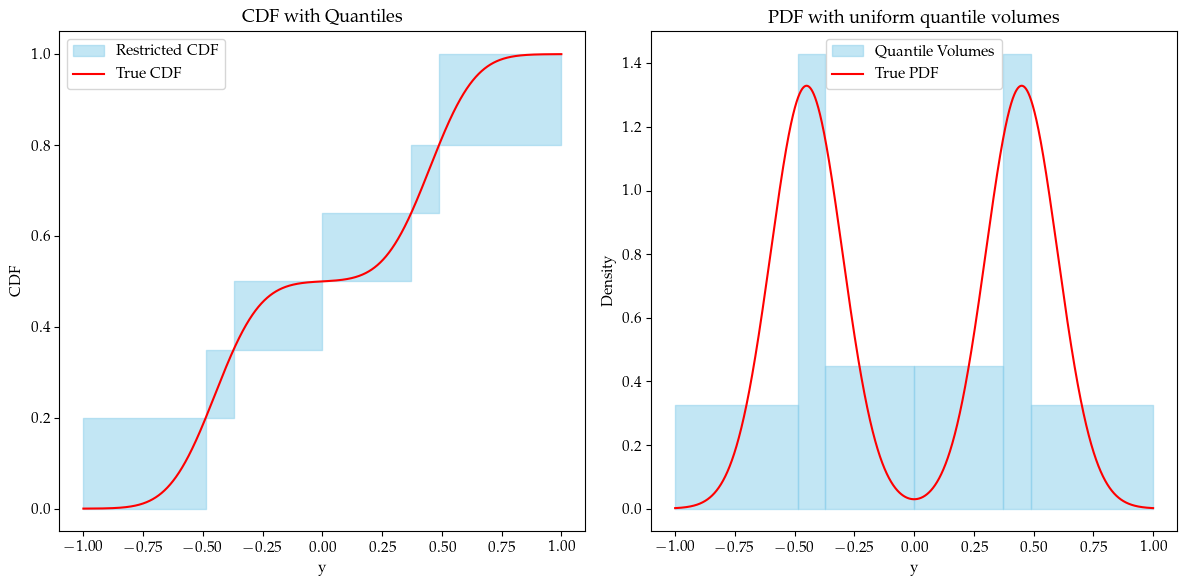

In [54]:
# Adjusting parameters for the bimodal Gaussian mixture as provided
mean1 = -0.45
mean2 = 0.45
std = 0.15  # Common standard deviation
weight1 = weight2 = 0.5  # Equal weights

# Define the bimodal Gaussian mixture CDF
def bimodal_gaussian_mixture_cdf(x):
    return weight1 * norm.cdf(x, mean1, std) + weight2 * norm.cdf(x, mean2, std)

def bimodal_gaussian_mixture_pdf(x):

    return weight1 * norm.pdf(x, mean1, std) + weight2 * norm.pdf(x, mean2, std)

# Recalculate the CDF with new parameters
x_points_dense = np.linspace(-1, 1, 10000)
y_points_dense = bimodal_gaussian_mixture_cdf(x_points_dense)
y_points_pdf = bimodal_gaussian_mixture_pdf(x_points_dense)

# Calculate quantile positions
n_quants = 5
quantiles = np.linspace(1/n_quants, 1 - 1/n_quants, n_quants)
wanted_x_vals = np.searchsorted(y_points_dense, quantiles)  # More efficient than argmin for this purpose

plt.figure(figsize=(12, 6))

# Plot 1: Bimodal Gaussian Mixture CDF with quantiles
plt.subplot(1, 2, 1)
for i in range(n_quants -1):
    idx = wanted_x_vals[i]
    idx_next = wanted_x_vals[i + 1]
    plt.fill_betweenx([y_points_dense[idx], y_points_dense[idx_next]], x_points_dense[idx], x_points_dense[idx_next], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, y_points_dense[wanted_x_vals[0]]], -1, x_points_dense[wanted_x_vals[0]], color='skyblue', alpha=0.5, label="Restricted CDF")
plt.fill_betweenx([y_points_dense[wanted_x_vals[-1]], 1], x_points_dense[wanted_x_vals[-1]], 1, color='skyblue', alpha=0.5)
plt.plot(x_points_dense, y_points_dense, 'r-', label='True CDF')
plt.title('CDF with Quantiles')
plt.xlabel('y')
plt.ylabel('CDF')
plt.legend()

# Plot 2: Volumes under the quantiles
plt.subplot(1, 2, 2)
volume = 1/(n_quants+1)
for i in range(n_quants -1):
    idx = wanted_x_vals[i]
    idx_next = wanted_x_vals[i + 1]
    length = x_points_dense[idx_next] - x_points_dense[idx]
    curr_volume = volume / length
    plt.fill_betweenx([0, curr_volume], x_points_dense[idx], x_points_dense[idx_next], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, volume/(x_points_dense[wanted_x_vals[0]] + 1)], -1, x_points_dense[wanted_x_vals[0]], color='skyblue', alpha=0.5)
plt.fill_betweenx([0, volume/(1 - x_points_dense[wanted_x_vals[-1]])],  x_points_dense[wanted_x_vals[-1]], 1, color='skyblue', alpha=0.5, label="Quantile Volumes")
plt.plot(x_points_dense, y_points_pdf, 'r-', label='True PDF')
plt.title('PDF with uniform quantile volumes')
plt.xlabel('y')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.savefig('figure.png')
plt.show()

## Focus on Density and not coverage

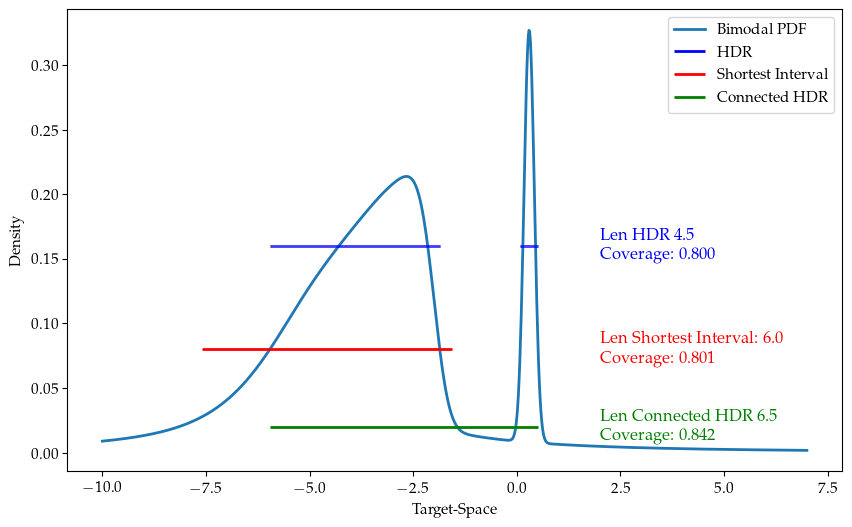

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, cauchy
from scipy.stats import norm, skewnorm

def bimodal_distribution(x, mu1, gamma1, mu2, sigma2, alpha2, mu3, sigma3, p1, p2):
    return p1 * cauchy.pdf(x, mu1, gamma1) + p2 * skewnorm.pdf(x, alpha2, mu2, sigma2) + (1-p1-p2) * norm.pdf(x, mu3, sigma3)

def find_shortest_interval(x, pdf, coverage):
    n = len(x)
    pdf_norm = pdf / np.sum(pdf)
    found = False
    for i in range(1, n):
        for e in range(n-i):
            if np.sum(pdf_norm[e:e+i]) >= coverage:
                best_left = x[e]
                best_right = x[e+i]
                found = True
                break      
        if found:
            break 
    
    return best_left, best_right

def find_hdr(x, pdf, converage):
    n = len(x)
    pdf_norm = pdf / np.sum(pdf)

    sorted_idx = np.argsort(pdf_norm)[::-1]
    cumsum = np.cumsum(pdf_norm[sorted_idx])

    idx = np.argmax(cumsum >= converage)

    mask = np.zeros(n, dtype=bool)
    mask[sorted_idx[:idx]] = True
    
    return mask

# Set parameters for the bimodal Gaussian distribution
mu1, gamma1 = -5, 2.0  # Parameters for the Cauchy distribution (left tail)
mu2, sigma2, alpha2 = -2, 2, -7  # Parameters for the skewed Gaussian distribution (left component)
mu3, sigma3 = .3, 0.125  # Parameters for the Gaussian distribution (right component)
p1, p2 = 0.4, 0.5  # Mixture weights for the left tail and left component


# Generate data points
x = np.linspace(-10, 7, 1000)
y = bimodal_distribution(x, mu1, gamma1, mu2, sigma2, alpha2, mu3, sigma3, p1, p2)
bin_size = x[1] - x[0]

# Find the shortest conformal interval
coverage = 0.8
left, right = find_shortest_interval(x, y, coverage)
mask = find_hdr(x, y, coverage)

len_shortest_interval = right - left + bin_size
len_hdr = np.sum(mask) * bin_size
len_connected_hdr = np.max(x[mask]) - np.min(x[mask]) + bin_size

normalized_density = y / np.sum(y)
coverage_shortest_interval = np.sum(normalized_density[(x >= left) & (x <= right)])
coverage_hdr = np.sum(normalized_density[mask])
coverage_connected_hdr = np.sum(normalized_density[(x >= np.min(x[mask])) &  (x <= np.max(x[mask]))])



# Plot the bimodal Gaussian distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, linewidth=2, label='Bimodal PDF')
# plt.fill_between([left, right], 0, 1, alpha=0.3, label=f'{coverage*100}\% Shortest Interval')

# plt.text(-8, 0.9, f'Len Shortest Interval {len_shortest_interval:.1f}', fontsize=12)
# plt.text(-8, 0.8, f'Len HDR {len_hdr:.1f}', fontsize=12)
# plt.text(-8, 0.7, f'Len Connected HDR {len_connected_hdr:1f}', fontsize=12)

# plt.fill_between(x, 1, where=mask, alpha=0.3, label=f'{coverage*100}\% HDR')

y_hdr = 0.16
y_shortest = 0.08
y_connected = 0.02

first = True
for i in range(len(x)):
    if mask[i]:
        if first:
            plt.hlines(y_hdr, x[i]-bin_size/2, x[i]+bin_size/2, color="b", linewidth=2, label="HDR")
            first = False
        else:
            plt.hlines(y_hdr, x[i]-bin_size/2, x[i]+bin_size/2, color="b", linewidth=2)

plt.text(2, y_hdr, f'Len HDR {len_hdr:.1f}\nCoverage: {coverage_hdr:.3f}', fontsize=12, va='center', color='b')

plt.hlines(y_shortest, left-bin_size/2, right+bin_size/2, colors='r', linewidth=2, label='Shortest Interval')
plt.text(2, y_shortest, f'Len Shortest Interval: {len_shortest_interval:.1f}\nCoverage: {coverage_shortest_interval:.3f}', fontsize=12, va='center', color='r')

plt.hlines(y_connected, np.min(x[mask])-bin_size/2, np.max(x[mask])+bin_size/2, colors='g', linewidth=2, label='Connected HDR')
plt.text(2, y_connected, f'Len Connected HDR {len_connected_hdr:.1f}\nCoverage: {coverage_connected_hdr:.3f}', fontsize=12, va='center', color='g')


plt.xlabel('Target-Space')
plt.ylabel('Density')
plt.legend()
#plt.grid(True)
plt.savefig('bimodal_distribution_hdr_vs_shortest_interval.png')
plt.show()